# Image contouring

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

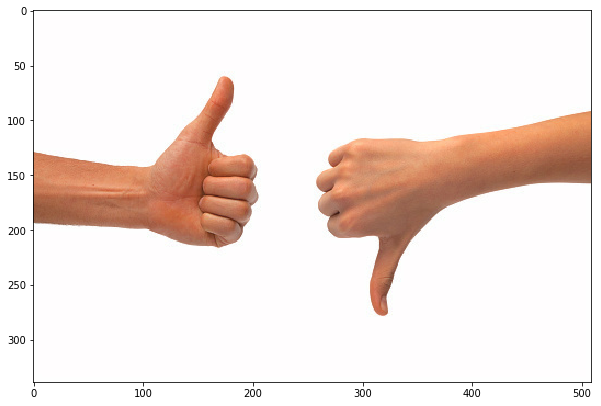

In [44]:
img = cv2.imread("images/thumbs_up_down.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img);

## Binary image, contours, drawing

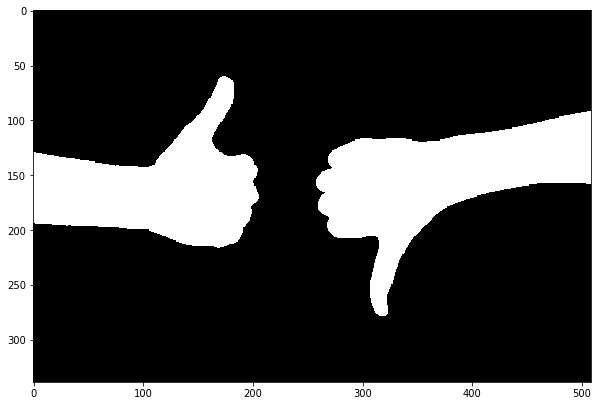

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

_, thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap="gray");

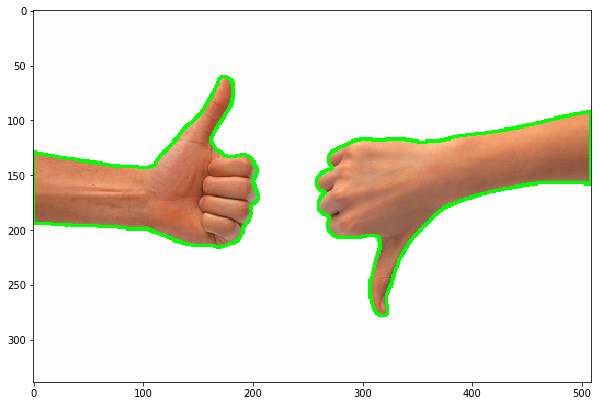

In [7]:
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cont_img = np.copy(img)
cont_img = cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cont_img);

# Contour features

## Orientation
Is the angle which the object is directed, to find the angle of a contour you should first find an ellipse that fits and extract the angle from that shape
`(x, y), (MA, ma), angle = cv2.fitEllipse(contour)`

### Orientation values
The values are in degrees measured from x-axis.
* 0 -> flat line
* 90 -> pointing up ...

In [46]:
img_el = np.copy(img)
def orientations(contours):
    angles = []
    for idx, contour in enumerate(contours):
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles

angles = orientations(contours)
print("Angles of each contour: {}" .format(angles))

Angles of each contour: [61.35833740234375, 82.27550506591797]


## Bounding rectangle

`x, y, w, h = cv2.boundingRect(contour)` to get the position for the current contour


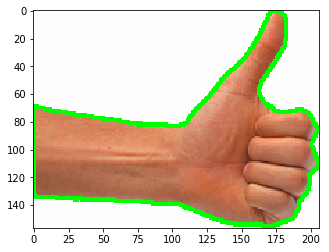

In [52]:
def left_hand_crop(image, contour):
    
    x, y, w, h = cv2.boundingRect(contour)
    image = image[y:y+h, x:x+w]    
    cropped_img = np.copy(image)
    
    return cropped_img

index = np.argmax(angles)
cropped = left_hand_crop(cont_img, contours[index])

plt.imshow(cropped);